In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Data Preprocessing

In [3]:
#look at number of rows
len(df)

7043

7043 rows

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
#notice TotalCharges comes back as an object.
#this datatype should be numeric
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
#convert the TotalCharges series to numberic
total_charges = pd.to_numeric(df.TotalCharges, errors ='coerce')

#then spot non-numeric data 
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [8]:
#Now fill these missing values with zeros 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

In [9]:
#lower case all column names and get rid of spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns: 
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
#now lets look at our target variable and turn it into a boolean

df.churn = (df.churn == 'yes').astype(int)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [13]:
df_train_full.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [14]:
df_train, df_val = train_test_split(df_train_full, test_size = 0.33, random_state = 11)

In [15]:
y_train = df_train.churn.values
y_val = df_val.churn.values

In [16]:
del df_train['churn']
del df_val['churn']


## Exploratory data analysis

In [17]:
#notice no missing values in the entire set
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [18]:
#look at target variables inbalance
df_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [19]:
#27 percent of customers churned
1521/5634

0.26996805111821087

In [20]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [21]:
#separate vars by type: cata and numeric
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
              'phoneservice', 'multiplelines', 'internetservice',
              'onlinesecurity', 'onlinebackup', 'deviceprotection', 
              'techsupport', 'streamingtv', 'streamingmovies', 'contract', 
              'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [22]:
#verify how many unique vars are within each category
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance 

Understanding what variables are important to the model not only improves it accuracy, but it also helps to answer questions like "what makes customers churn?" and "what characteristics do these customers have?"

Lets look at churn rate for each variable. 

In [23]:
#starting with catagorical variables 

female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()

male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

#The means are quite close - meaning gender is not a useful predictor
female_mean, male_mean

(0.27682403433476394, 0.2632135306553911)

In [24]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()

partner_yes, partner_no

(0.20503330866025166, 0.3298090040927694)

## Risk Rate 

The ratio between probabilities in different groups is a risk ratio (i.e. risk = group rate / global rate) 

This can tell us how likely the elements of the group are to have the effect churn compare with the entire population. 



In [25]:
global_mean = df_train_full.churn.mean()

df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean

df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [26]:
#Now do this for all catagorical variables

for col in categorical:
    df_group = df_train_full.groupby(by = col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group) #see contents of data frame inside the loop 



,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


## Mutual Information

For catagorical variables we use the metric of 'mutual information' to tell us how much information we learn about one variable if we learn the value of another variable.  This only works to measure the strength of dependence between two catagorical variables.

This is how we determine the strength of dependence of our target variable against our independent catagorical variables 

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
def calculate_mi(series): 
    return mutual_info_score(series, df_train_full.churn)

In [29]:
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending = False).to_frame(name = 'MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [30]:
# The most useful features have a higher MI score 

## Correlation Coeeficient

In [31]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

We can see that monthly charges has a positive correlation with our churn target variable and thus - when it goes up so does churn. 

## Feature Engineering: One-Hot enconding categorical variables

In [32]:
train_dict= df_train[categorical + numerical].to_dict(orient = 'records')

In [33]:
train_dict

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 71,
  'monthlycharges': 86.1,
  'totalcharges': 6045.9},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'credit_card_(automatic)',
  'tenure': 60,
  'monthlycharges': 100.5,
  'totalcharges': 6029.0},
 {'gender':

In [34]:
from sklearn.feature_extraction import DictVectorizer

In [35]:
dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [36]:
X_train = dv.transform(train_dict)

In [37]:
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [38]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

## Training logistic regression

        

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression(solver = 'liblinear', random_state = 1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [41]:
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

In [42]:
y_pred = model.predict_proba(X_val)[:,1]

In [43]:
churn = y_pred >= 0.5

In [44]:
(y_val == churn).mean()

0.8016129032258065

In [45]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


## Using the model

In [46]:
vars = categorical + numerical

In [47]:
customer = {'customerid': '8879-zkjof'}
for v in vars:
    customer[v] = None

In [48]:
customer['gender'] = 'female'
customer['seniorcitizen'] =0
customer['partner'] = 'no'
customer['dependents'] = 'no'
customer['tenure'] = 41
customer['phoneservice'] = 'yes'
customer['multiplelines'] = 'no'
customer['internetservice'] = 'dsl'
customer['onlinesecurity'] = 'yes'
customer['onlinebackup'] = 'no'
customer['deviceprotection'] = 'yes'
customer['techsupport'] = 'yes'
customer['streamingtv'] = 'yes'
customer['streamingmovies'] = 'yes'
customer['contract'] = 'one_year'
customer['paperlessbilling'] = 'yes'
customer['paymentmethod'] = 'bank_transfer_(automatic)'
customer['monthlycharges'] = 79.85
customer['totalcharges'] = 3320.75

In [49]:
X_test = dv.transform([customer])

In [50]:
#the given customer has a 0.927 percent chance of staying vs a 0.073 chance of leaving
model.predict_proba(X_test).round(3)

array([[0.927, 0.073]])

In [51]:
#this is the churn
model.predict_proba(X_test).round(3)[0,1]

0.073

In [52]:
#now try one more client
customer2 = {'customerid': '6789-zjkor'}

for v in vars:
    customer[v] = None

In [53]:
customer2['gender'] = 'female'
customer2['seniorcitizen'] = 1
customer2['partner'] = 'no'
customer2['dependents'] = 'no'
customer2['tenure'] = 1
customer2['phoneservice'] = 'yes'
customer2['multiplelines'] = 'yes'
customer2['internetservice'] = 'fiber_optic'
customer2['onlinesecurity'] = 'yes'
customer2['onlinebackup'] = 'no'
customer2['deviceprotection'] = 'no'
customer2['techsupport'] = 'no'
customer2['streamingtv'] = 'yes'
customer2['streamingmovies'] = 'no'
customer2['contract'] = 'month-to-month'
customer2['paperlessbilling'] = 'yes'
customer2['paymentmethod'] = 'electronic_check'
customer2['monthlycharges'] = 85.7
customer2['totalcharges'] = 85.7

In [54]:
X_test = dv.transform([customer2])

model.predict_proba(X_test).round(2)[:,1]

array([0.75])

## Evaluation Metrics

In [55]:
y_pred = model.predict_proba(X_val)[:,1]

In [56]:
churn = y_pred >= 0.5
(churn == y_val).mean()

0.8016129032258065

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
thresholds = np.linspace(0,1,11) #creates an array with different thresholds

for t in thresholds:
    churn = y_pred >= t 
    acc = accuracy_score(y_val, churn)
    print('%0.2f %0.3f'% (t,acc))

0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


Text(0, 0.5, 'accuracies')

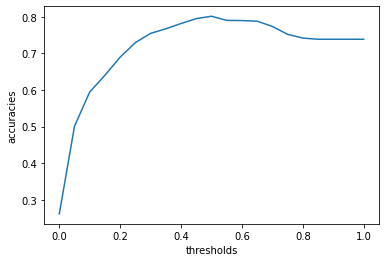

In [59]:
#use matplotlib to show how accuracy changes depending on the threshold
thresholds = np.linspace(0,1,21) #creates an array with different thresholds
accuracies = []


for t in thresholds:
    churn = y_pred >= t 
    acc = accuracy_score(y_val, churn)
    accuracies.append(acc)
    
plt.plot(thresholds, accuracies)
plt.xlabel('thresholds')
plt.ylabel('accuracies')

To know if if this is actually good - we need to have a dummy baseline

In [60]:
#Baseline prediction

#Gets number of customers in validation set
size_val = len(y_val) 

#creates an array with only false elements for our dummy predictions 
baseline = np.repeat(False, size_val)

In [61]:
accuracy_score(baseline, y_val).round(2)

0.74

As we can see the, the accuracy of the model is only 6% better than the naive baseline
This is not much improvement from a model that is guessing that none of the customers will churn (i.e. the Naive Baseline) 

## Confusion Table

In [62]:
t = 0.5 #threshold of 50% if above the threshold then churn, else no churn 

predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (actual_no_churn & predict_no_churn).sum()


In [63]:
confusion_table = np.array([[true_negative, false_positive],
                           [false_negative, true_positive]])

In [64]:
confusion_table 

array([[1202,  172],
       [ 197,  289]])

In [65]:
confusion_table / confusion_table.sum()

array([[0.64623656, 0.09247312],
       [0.10591398, 0.15537634]])

## Precision and Recall 

In [66]:
#precision tells us how many of the positive predictions turned out to be correct 
#(i.e. the fratction of correctly predicted postive examples )

P = true_positive.sum() / (true_positive + false_positive).sum()
P.round(2)



0.63

In [67]:
#Recall is the fraction of correctly classified positive examples over all positive examples
#(i.e. the number of customers who churned & how many we managed to correctly identify)

R = true_positive.sum() / (true_positive + false_negative).sum()
R.round(2)

0.59

In [68]:
#Compute the confusion tagble for different thresholds
scores = []

tresholds = np.linspace(0, 1, 101)

for t in thresholds: 
    tp = ((y_pred >=t) & (y_val == 1)).sum()
    fp = ((y_pred >=t) & (y_val == 0)).sum()
    fn = ((y_pred <t) & (y_val == 1)).sum()
    tn = ((y_pred <t) & (y_val == 0)).sum()
    
    scores.append((t,tp,fp,fn,tn))
    

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

In [69]:
df_scores[::3] ## shows every third record of the dataframe

,threshold,tp,fp,fn,tn
0,0.00,486,1374,0,0
3,0.15,445,628,41,746
6,0.30,380,350,106,1024
9,0.45,318,213,168,1161
12,0.60,200,105,286,1269
15,0.75,44,19,442,1355
18,0.90,0,0,486,1374


In [70]:
# Compute the TPR and FPR scores
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [71]:
df_scores[::5]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,486,1374,0,0,1.000000,1.000000
5,0.25,409,426,77,948,0.841564,0.310044
10,0.50,289,172,197,1202,0.594650,0.125182
15,0.75,44,19,442,1355,0.090535,0.013828
20,1.00,0,0,486,1374,0.000000,0.000000


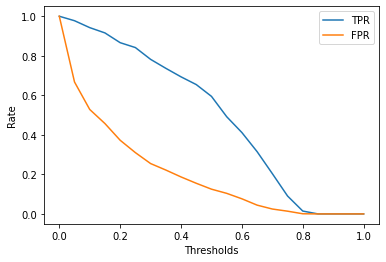

In [72]:
plt.plot(df_scores.threshold, df_scores.tpr, label = 'TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label = 'FPR')
plt.xlabel('Thresholds')
plt.ylabel('Rate')
plt.legend()

At a threshold of 0.0 - we predict churn for everyone:
    
    FPR is 100% because we have only false positives in the prediction. 
    There are no true negatives: nobody is predicted as 'non-churning'
    
    TPR is 100% because we only have T

## Random Baseline Model

In [73]:
np.random.seed(83)

y_rand = np.random.uniform(0,1, size = len(y_val))

In [74]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    
    tresholds = np.linspace(0, 1, 101)

    for t in thresholds: 
        tp = ((y_pred >=t) & (y_val == 1)).sum()
        fp = ((y_pred >=t) & (y_val == 0)).sum()
        fn = ((y_pred <t) & (y_val == 1)).sum()
        tn = ((y_pred <t) & (y_val == 0)).sum()
    
        scores.append((t,tp,fp,fn,tn))
    
    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [75]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [76]:
df_rand[::2]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
2,0.1,450,1252,36,122,0.925926,0.911208
4,0.2,393,1086,93,288,0.808642,0.790393
6,0.3,347,945,139,429,0.713992,0.687773
8,0.4,302,815,184,559,0.621399,0.593159
10,0.5,261,661,225,713,0.537037,0.481077
12,0.6,215,521,271,853,0.442387,0.379185
14,0.7,162,390,324,984,0.333333,0.283843
16,0.8,100,264,386,1110,0.205761,0.192140
18,0.9,48,124,438,1250,0.098765,0.090247


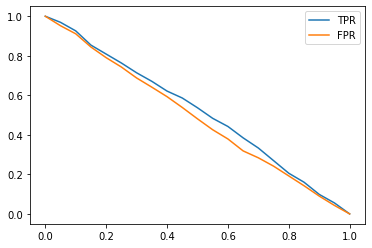

In [77]:
plt.plot(df_rand.threshold, df_rand.tpr, label = 'TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label = 'FPR')
plt.legend()

## The Ideal Model

The ideal model always makes correct decisions 

In [78]:
#calculate the number of positive and negative values in the dataset
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()  

In [79]:
#generate an array that first repeats zeros num_neg number of times 
#followed by ones, num_pos number of times 
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0,1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)

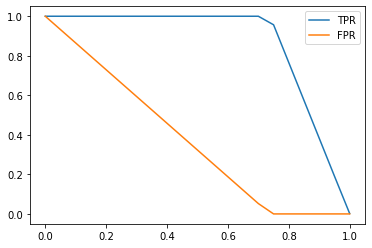

In [80]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label = 'FPR')
plt.legend()

The threshold of 0.74% is the ideal situation: all churning customers are classified as churning

## ROC curve

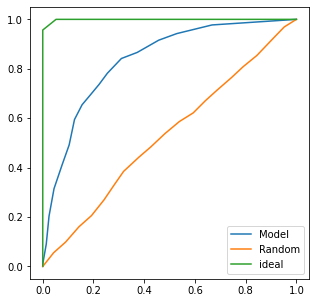

In [81]:
plt.figure(figsize = (5,5)) #makes plot square

plt.plot(df_scores.fpr, df_scores.tpr, label = 'Model')
plt.plot(df_rand.fpr, df_rand.tpr, label = 'Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label = 'ideal')

plt.legend()

The ROC curve of a random model serves as a good visual baseline to see how well our model is performing from this baseline.  

In [82]:
from sklearn.metrics import roc_curve

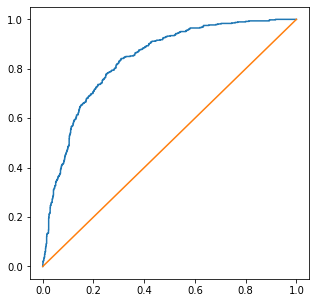

In [83]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize = (5,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

## AUC

An auc score of 0.9, is good 0.8 is okay, and 0.7 is poor

In [84]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.8351386118449033

In [85]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8363366398907399

## Parameter tuning

In [86]:
# Training the model
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse = False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    model = LogisticRegression(solver ='liblinear')
    model.fit(X, y)
    
    return dv, model

In [87]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient = 'records')
    
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:,1]
    
    return y_pred

In [88]:
#kfold cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle = True, random_state =1)

aucs = []

for train_idx, val_idx, in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    
    aucs.append(auc)

In [89]:
print('auc = %0.3f +- %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.842 +- 0.012


In [90]:
##Finding the best parameters 

def train(df, y, C):  #adds an extra parameter to the train funciton
    cat = df[categorical + numerical].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse = False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    
    model = LogisticRegression(solver ='liblinear', C=C)
    model.fit(X, y)
    
    return dv, model

In [91]:
nfolds = 5

kfold = KFold(n_splits = nfolds, shuffle = True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        
        dv, model = train(df_train, y_train, C=C)
        
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
        
    print('C = %s, auc = %0.3f +- %0.3f' % (C, np.mean(aucs), np.std(aucs)))
        
        
        
    

C = 0.001, auc = 0.825 +- 0.013
C = 0.01, auc = 0.839 +- 0.009
C = 0.1, auc = 0.841 +- 0.008
C = 0.5, auc = 0.841 +- 0.007
C = 1, auc = 0.841 +- 0.007
C = 10, auc = 0.841 +- 0.007


In [92]:
#Now select 0.5

y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv_model = train(df_train_full, y_train,  C =0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)

print('auc = %.3f' % auc)



auc = 0.857


## Using the model

In [93]:
#Use a single customer again

customer2

{'customerid': '6789-zjkor',
 'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'tenure': 1,
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'monthlycharges': 85.7,
 'totalcharges': 85.7}

In [94]:

def predict_single(customer, dv, model):
    X = dv.transform([customer]) #vectorizes the customer: creates the matrix X
    y_pred = model.predict_proba(X)[:,1] #applies the model to the matrix
    return y_pred[0]

In [95]:
predict_single(customer2, dv, model)

0.7427052321853637

## Using pickles to save and load models

In [96]:
import pickle

#Specifies the filed we want to save
with open('churn-model.bin', 'wb') as f_out: 
    pickle.dump((dv, model), f_out)  #we need to save the DictVectorizer and model as a tuple with two elements 

Run the model in a flask microservice and then post request to the service to test.

In [98]:
import requests 

customer = {
    'customerid': '83189-jkofz',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': '17',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice' : 'dsl',
    'onlinesecurity' : 'yes',
    'onlinebackup' : 'yes',
    'deviceprotection' : 'no',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'no',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 69.85,
    'totalcharges': 3345.75
    }

url = 'http://localhost:9696/predict'



In [105]:
response = requests.post(url, json=customer2)
result = response.json()

In [106]:
result

{'churn': True, 'churn_probability': 0.7427052321853637}